In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import distinctipy as dpy
import colormaps as cmaps
import numpy as np

In [8]:
loss_path = "../../data/plot_data/human_cells/tuner_full_losses.csv"
loss_df = pd.read_csv(loss_path)

In [9]:
loss_df[loss_df['reconstruction_loss'] == loss_df['reconstruction_loss'].max()]

,loss,reconstruction_loss,divergence_loss,epochs,batch_size,save_on,n_emb,n_lay,lr,lrelu_slope,dataset,dataset_size,join,refresh_data_on,reload_dataset_aux,main_folder,losses_file
108,1222.816701,1206.812215,16.004489,128.0,128.0,128.0,32.0,16.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/89,./data/tuner/full/runs/89/losses.csv
109,1222.816701,1206.812215,16.004489,128.0,128.0,128.0,32.0,16.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/89,./data/tuner/full/runs/89/losses.csv
110,1222.816701,1206.812215,16.004489,128.0,128.0,128.0,32.0,16.0,0.0004,0.01,./data/samples/human_cells/,65536,inter,8,False,./data/tuner/full/runs/89,./data/tuner/full/runs/89/losses.csv


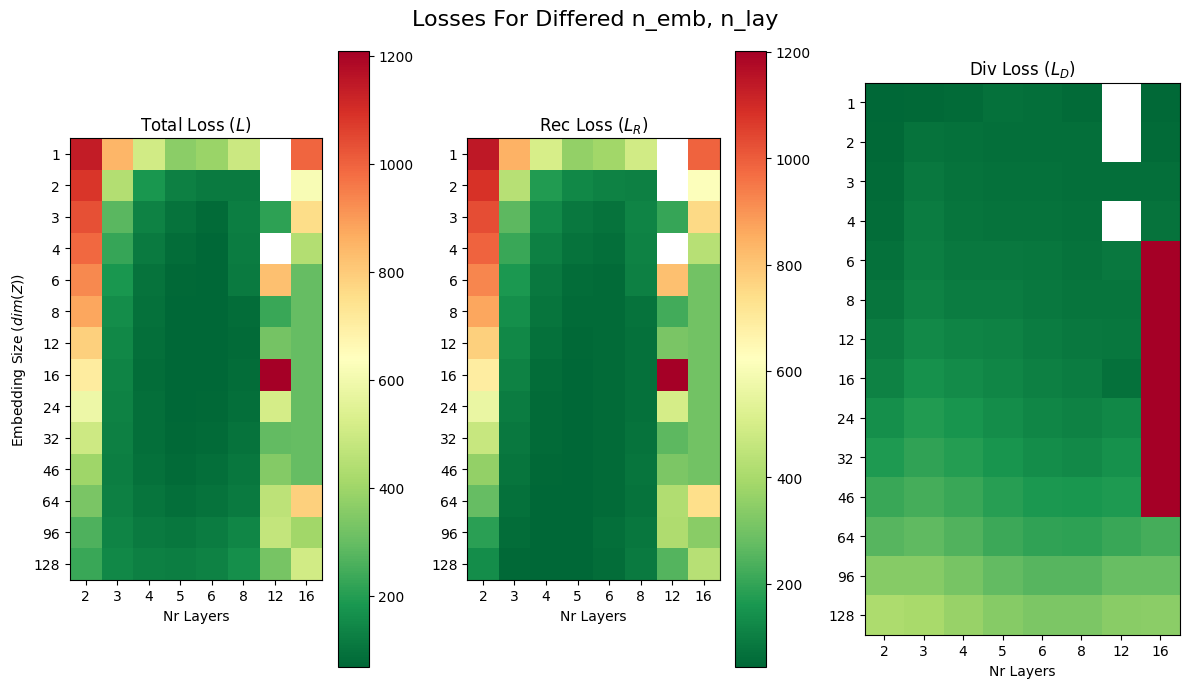

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,7))

n_embs = sorted(map(int, loss_df['n_emb'].unique()))
n_lays = sorted(map(int, loss_df['n_lay'].unique()))

n_n_emb = len(n_embs)
n_n_lay = len(n_lays)

losses =   np.ones((n_n_emb, n_n_lay)) * 300
r_losses = np.ones((n_n_emb, n_n_lay)) * 300
d_losses = np.ones((n_n_emb, n_n_lay)) * 300

for i, n_emb in enumerate(n_embs):
    i_df = loss_df[loss_df['n_emb'] == n_emb]
    for j, n_lay in enumerate(n_lays):
        ij_df = i_df[i_df['n_lay'] == n_lay]

        if len(ij_df) == 1:
            losses[i,j] = ij_df['loss'].mean()
            r_losses[i,j] = ij_df['reconstruction_loss'].mean()
            d_losses[i,j] = ij_df['divergence_loss'].mean()

def plot(ax, losses, title):
    im = ax1.imshow(losses, cmap='RdYlGn_r')
    plt.colorbar(im)
    ax.set_yticks(range(n_n_emb), n_embs)
    ax.set_xticks(range(n_n_lay), n_lays)
    ax.set_xlabel("Nr Layers")
    ax.set_ylabel("Embedding Size ($dim(Z)$)")
    ax.set_title(title)

plot(ax1, losses, "Total Loss ($L$)")
plot(ax2, r_losses, "Rec Loss ($L_R$)")

im2 = ax2.imshow(r_losses, cmap='RdYlGn_r')
cbar2 plt.colorbar(im2)
ax2.set_yticks(range(n_n_emb), n_embs)
ax2.set_xticks(range(n_n_lay), n_lays)
ax2.set_xlabel("Nr Layers")
ax2.set_title()

ax3.imshow(d_losses, cmap='RdYlGn_r')
ax3.set_yticks(range(n_n_emb), n_embs)
ax3.set_xticks(range(n_n_lay), n_lays)
ax3.set_xlabel("Nr Layers")
ax3.set_title("Div Loss ($L_D$)")

fig.suptitle("Losses For Differed n_emb, n_lay", fontsize=16)

fig.tight_layout()